In [1]:
# import libraries
%matplotlib inline
import pandas as pd
import keras
from keras.datasets import mnist
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
# Download MNIST datasets 
# This datasets include 2 tapples. x_train, x_test(28,28) and y_train, y_test(9 classes).
(x_train, y_train), (x_test, y_test) = mnist.load_data()

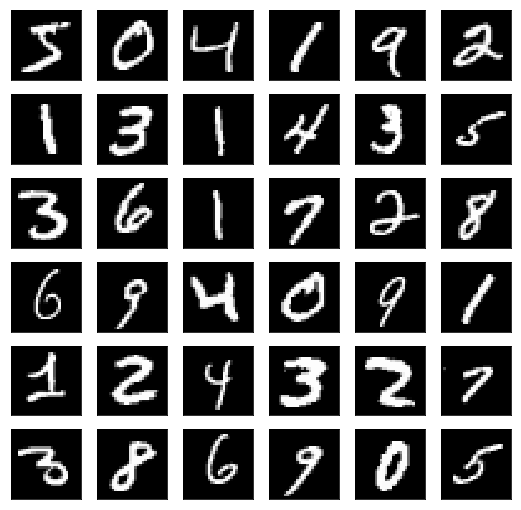

In [3]:
# show sample data
fig = plt.figure(figsize=(9,9))

for i in range(36):
    ax = fig.add_subplot(6, 6, i+1, xticks=[], yticks=[])
    ax.imshow(x_train[i], cmap='gist_gray')

In [4]:
# reshape 28*28 pixel data into 784 dim data
# convert into float type and normalize pixel data from 0.0 to 1.0
x_train = x_train.reshape(60000, 784).astype('float32') /255
x_test = x_test.reshape(10000, 784).astype('float32') /255

# encode label data into "one-hot" 
y_train = keras.utils.np_utils.to_categorical(y_train.astype('int32'),10)
y_test = keras.utils.np_utils.to_categorical(y_test.astype('int32'),10)



In [5]:
from keras.models import Sequential
from keras.layers import Dense, Activation

# モデルの作成
model = Sequential()

# モデルにレイヤーを積み上げていく
model.add(Dense(units=64, input_dim=100))
model.add(Activation('relu'))
model.add(Dense(units=10))
model.add(Activation('softmax'))

# 訓練プロセスの定義
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

# 訓練の実行
# (x_train, y_trainはNumpy行列の学習データ)
model.fit(x_train, y_train, epochs=5, batch_size=32)

# 予測の実行
classes = model.predict(x_test, batch_size=128)



ValueError: Error when checking input: expected dense_1_input to have shape (None, 100) but got array with shape (60000, 784)

In [ ]:
from keras.layers import Input, Dense
from keras.models import Model

# インプットの定義
inputs = Input(shape=(784,))

# レイヤーの定義
nw = Dense(64, activation='relu')(inputs)
nw = Dense(64, activation='relu')(x)
predictions = Dense(10, activation='softmax')(x)

# モデルの定義(インプットとレイヤーを指定)
model = Model(inputs=inputs, outputs=predictions)

# 訓練プロセスの定義
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

#  訓練の実行
model.fit(data, labels)

# 予測の実行
classes = model.predict(x_test, batch_size=128)



In [ ]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
x_train = x_train.reshape(60000, 784).astype('float32') /255
x_test = x_test.reshape(10000, 784).astype('float32') /255

y_train = keras.utils.np_utils.to_categorical(y_train.astype('int32'),10)
y_test = keras.utils.np_utils.to_categorical(y_test.astype('int32'),10)


In [ ]:
inputs = Input(shape=(784,))

nw = Dense(512, activation='relu')(inputs)
nw = Dropout(.5)(nw)
nw = Dense(512, activation='relu')(nw)
nw = Dropout(.5)(nw)
predictions = Dense(10, activation='softmax')(nw)

In [ ]:
history = model.fit(x_train, y_train, batch_size=128, epochs=20, verbose=1, validation_data=(x_test, y_test))

In [ ]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()